# Şekil Fonksiyonları ve Varyasyonel Formlar

## Şekil Fonksiyonları

Sonlu elemanlar yönteminde, geometriyi temsil eden sürekli bir fonksiyon setine ihtiyaç duyulur. Bu fonksiyonlar genellikle şekil fonksiyonları olarak tanımlanırlar ve temel olarak 3 özelliği bulunmalıdır;

1) Bu fonksiyonlar mesh boyunca her bir element için (parçalı şekilde) tanımlanabilmelidir.
2) Bu fonksiyonların mesh noktalarında aldığı değer birbirleri ile entegre edildiğinde pürüzsüz (sürekli) bir çözüm oluşturabilmelidir.
3) Bu fonksiyonlar seçilirken, bu fonksiyonların her birinin $\alpha_i$ değeri ile çarpımı, aradığımız çözümü vermelidir.

Bu derste konseptin daha iyi anlaşılması için 1 boyutlu şekil fonksiyonlarını ele alalım. Yukarıda sayılan özellikleri sağlamak en bilinen şekil fonksiyonları (şapka fonksiyonları olarak da bilinen) lineer parçalı polinom fonksiyonlardır. 

Öncelikle parçalanmış geometriyi yani mesh'i oluşturmamız gerekiyor. Burada işleri çok kolaylaştıracağı için bir boyutlu mesh sınıfı oluşturalım;

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class TekBoyutluMesh:
    def __init__(self, uzunluk, eleman_sayısı):
        self.L = uzunluk
        self.ES = eleman_sayısı
        self.NS = eleman_sayısı+1 # nokta sayısı
        self.h = uzunluk/eleman_sayısı # eleman uzunluğu
        self.koordinatlar = np.linspace(0,uzunluk,self.NS)

Şimdi de tek boyutlu uzunluğu 1m olan ve birden fazla elemandan oluşan ilk meshimizi oluşturabiliriz;

In [6]:
uzunluk = 1
eleman_sayisi = 2
mesh = TekBoyutluMesh(uzunluk, eleman_sayisi)

Oluşturduğumuz meshi nokta numaralarıyla birlikte görüntüleyelim;

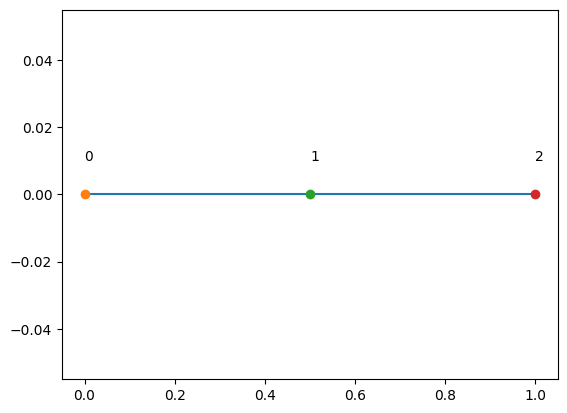

In [7]:
plt.plot([0,mesh.L],[0,0]) # Düz bir çizgi çizelim.
for numara,nokta in enumerate(mesh.koordinatlar): 
    plt.plot(nokta,0, "o-")
    plt.text(nokta,0.01,str(numara))

Geometrimizi eşit parçalardan oluşan parçalara ayırdığımız için her bir elemanın uzunluğu ($l_i$) aynı olacaktır. Şimdi de birinci dereceden parçalı bir fonksiyon tanımlayalım;

$$ v(x)=   \left\{
\begin{array}{ll}
      \frac{x-x_{i-1}}{l_i} & x_{i-1}\leq x \leq x_i \\
      \frac{x_{i+1}-x}{l_{i+1}} & x_{i}\leq x \leq x_{i+1} \\
      0 & \textit{diğer tüm durumlar} \\
\end{array} 
\right.  $$

Bu ifadeyi şimdi herhangi bir noktanın şekil fonksiyonunu tanımlamak için programlayabiliriz;

In [8]:
def v(mesh, nokta):
    # Bu fonksiyonu cizdirebilmek icin şekil fonksiyonlarına ait yeni mesh kullanalim:
    şekil_mesh = TekBoyutluMesh(mesh.L, mesh.NS*100)
    
    v_dizi = np.zeros(şekil_mesh.NS)
    for nokta_indisi, şekil_nokta in enumerate(şekil_mesh.koordinatlar):

        if  şekil_nokta >= mesh.koordinatlar[nokta-1] and şekil_nokta <= mesh.koordinatlar[nokta]:
            v_dizi[nokta_indisi] = (şekil_nokta-mesh.koordinatlar[nokta-1])/(mesh.h)

        elif  şekil_nokta >= mesh.koordinatlar[nokta] and şekil_nokta <= mesh.koordinatlar[nokta+1]: 
            v_dizi[nokta_indisi] = ((mesh.koordinatlar[nokta+1])-şekil_nokta)/(mesh.h)

        else:
            v_dizi[nokta_indisi] = 0
        
    return v_dizi, şekil_mesh

Bu fonksiyon ile 1 noktasına ait bir şekil fonksiyonu çizdirelim;

Text(1.0, 1.01, '2')

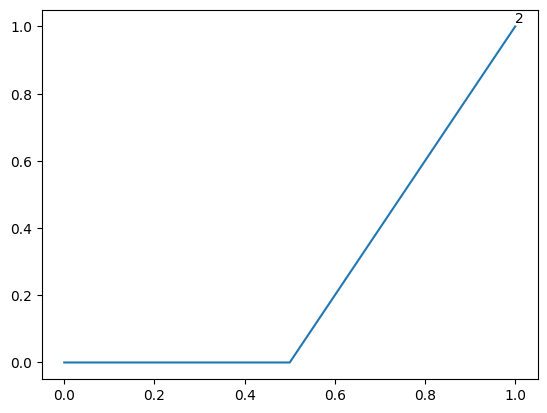

In [9]:
nokta = 2
şekil_fonksiyonu, şekil_mesh = v(mesh, nokta)
plt.plot(şekil_mesh.koordinatlar, şekil_fonksiyonu)
plt.text(mesh.koordinatlar[nokta],1.01,str(nokta))

Görüldüğü üzere 1 noktası için çizilen şekil fonksiyonu, 1 noktası hariç tüm noktalarda 0 değerini alır. Bu şekilde tüm noktalar için maksimum değeri 1 olan ayrı ayrı şekil fonksiyonları elde edilebilir;

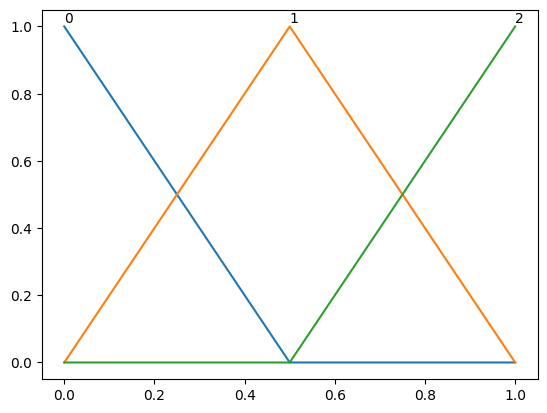

In [10]:
for nokta in range(mesh.NS):
    şekil_fonksiyonu, şekil_mesh = v(mesh, nokta)
    plt.plot(şekil_mesh.koordinatlar, şekil_fonksiyonu)
    plt.text(mesh.koordinatlar[nokta],1.01,str(nokta))

## Şekil Fonksiyonlarının Türevleri

Eksenel yüke maruz kalan çubuk probleminde görüldüğü üzere, denklemin varyasyonel (weak) formunda şekil fonksiyonlarının yer aldığı görülmektedir. Bu yüzden her bir nokta için türettiğimiz şekil fonksiyonlarının türevlerine ihtiyacımız vardır. Yukarıdaki 1 boyutlu şekil fonksiyonlarının türevi aşağıdaki şekilde koşullu fonksiyon olarak yazılabilir;

$$ \frac{dv}{dx}=   \left\{
\begin{array}{ll}
      \frac{1}{l_i} & x_{i-1}\leq x \leq x_i \\
      \frac{-1}{l_{i+1}} & x_{i}\leq x \leq x_{i+1} \\
      0 & \textit{diğer tüm durumlar} \\
\end{array} 
\right.  $$

Yukarıdaki koşullu fonksiyonu aynı şekilde Python fonksiyonu olarak tanımlayabiliriz; 

In [28]:
uzunluk = 1
eleman_sayisi = 2
mesh = TekBoyutluMesh(uzunluk, eleman_sayisi)

def dv_dx(mesh, nokta):
    # Bu fonksiyonu cizdirebilmek icin şekil fonksiyonlarına ait yeni mesh kullanalim:
    şekil_mesh = TekBoyutluMesh(mesh.L, mesh.NS*100)
    
    dv_dizi = np.zeros(şekil_mesh.NS)
    for nokta_indisi, şekil_nokta in enumerate(şekil_mesh.koordinatlar):

        if  şekil_nokta >= mesh.koordinatlar[nokta-1] and şekil_nokta <= mesh.koordinatlar[nokta]:
            dv_dizi[nokta_indisi] = (1)/(mesh.h)

        elif  şekil_nokta >= mesh.koordinatlar[nokta] and şekil_nokta <= mesh.koordinatlar[nokta+1]: 
            dv_dizi[nokta_indisi] = (-1)/(mesh.h)

        else:
            dv_dizi[nokta_indisi] = 0
        
    return dv_dizi, şekil_mesh

Şimdi herhangi bir nokta için bu türev fonksiyonunu kullanıp türev değerlerine bakalım;

Text(0.01, 0.04, '0')

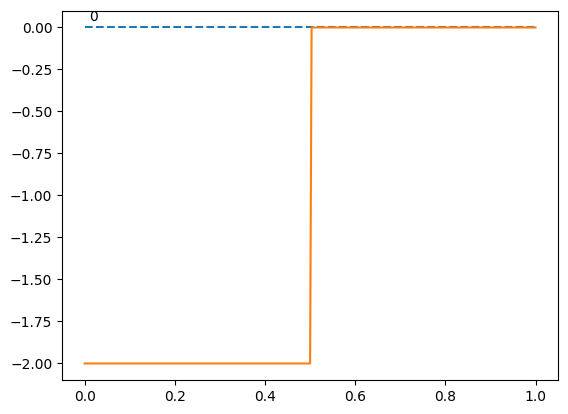

In [27]:
nokta = 0
dv, şekil_mesh = dv_dx(mesh, nokta)
plt.plot([0,mesh.L],[0,0],'--') # Düz bir çizgi çizelim.
plt.plot(şekil_mesh.koordinatlar, dv)
plt.text(mesh.koordinatlar[nokta]+0.01,0.04,str(nokta))

Türevleri daha iyi yorumlamak için 3 nokta için türevlerin aldığı değerleri tek bir grafikte gösterelim;

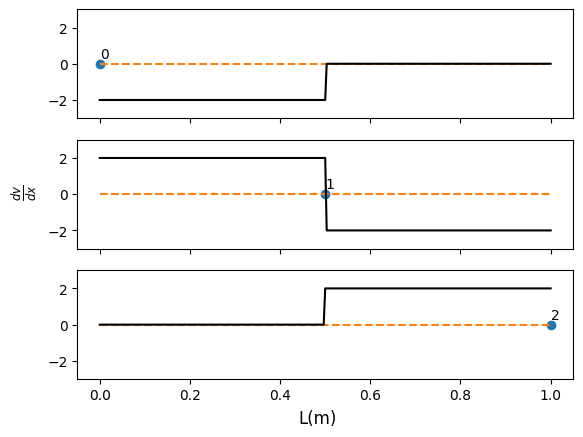

In [50]:
fig, ax = plt.subplots(3, 1, sharex=True)
fig.supxlabel('L(m)') # x ekseninin başlığı
fig.supylabel(r'$\frac{dv}{dx}$') # y ekseninin başlığı
for nokta in range(mesh.NS):
    dv, şekil_mesh = dv_dx(mesh, nokta)
    ax[nokta].plot(mesh.koordinatlar[nokta],0, "o-") # Noktayi gösterelim.
    ax[nokta].text(mesh.koordinatlar[nokta],0.3,str(nokta))
    ax[nokta].plot([0,mesh.L],[0,0],'--') # Düz bir çizgi çizelim.
    ax[nokta].plot(şekil_mesh.koordinatlar, dv, '-k') # Türevin aldığı değerleri gösterelim
    ax[nokta].set_ylim(-3,3) # y ekseninin minimum ve maksimum değerlerini değiştirelim.


Yukarıdaki grafikte görüldüğü üzere 1. eleman (0. ve 1. nokta arasındaki eleman) için integral işlemi yaparken 0. noktaya ait şekil fonksiyonunun türebi -2 değerini verirken, 1. noktaya ait şekil fonksiyonunun türevi tam tersine +2 değerini vermektedir.